# Extract Titanic data

In [1]:
!pip install python-dotenv

In [2]:
from dotenv import load_dotenv, find_dotenv

In [3]:
# find .env automatically by walking up directories
dotenv_path = find_dotenv()
# load up the entries as enviroment variables
load_dotenv(dotenv_path)

True

In [4]:
# extracting environment variable using os.environ.get
import os
KAGLLE_USERNAME = os.environ.get("KAGGLE_USERNAME")
print(KAGLLE_USERNAME)

solanki111


In [28]:
# imports
import requests
from requests import session
from dotenv import load_dotenv, find_dotenv
import pandas as pd
import numpy as np
import os

In [7]:
# payload for post
payload = {
    'actoin': 'login',
    'key': os.environ.get("KAGGLE_KEY"),
    'username': os.environ.get("KAGGLE_USERNAME"),
    'password': os.environ.get("KAGGLE_PASSWORD")
}

In [8]:
# url for train n test dataset
train = 'https://www.kaggle.com/c/titanic/download/train.csv'
test = 'https://www.kaggle.com/c/titanic/download/test.csv'

In [19]:
# kaggle download
data = !kaggle datasets download -d shuofxz/titanic-machine-learning-from-disaster

In [16]:
# setup session
with session() as c:
    # post request
    c.post('https://www.kaggle.com/account/login', data=payload)
    # get request
    response = c.get(train)
    # print response text
    print(response.text)

<!DOCTYPE html>
<html lang="en">
<head>
    <title>Kaggle: Your Home for Data Science</title>
    <meta charset="utf-8" />
    <meta name="robots" content="index, follow" />
    <meta name="description" content="Kaggle is the world&#x2019;s largest data science community with powerful tools and resources to help you achieve your data science goals." />
    <meta name="turbolinks-cache-control" content="no-cache" />
        <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0">
    <meta name="theme-color" content="#008ABC" />
    <script nonce="ukesoeUMOsK5OpcLw6Q3Vg==" type="text/javascript">
        if ('serviceWorker' in navigator) {
            navigator.serviceWorker.getRegistrations()
                .then(function(registrations) {
                    for (let registration of registrations) {
                        registration.unregister();
                    }
                })
                .catch(function(err) {
     

In [20]:
print(data)

['titanic-machine-learning-from-disaster.zip: Skipping, found more recently modified local copy (use --force to force download)']


In [2]:
# connect to kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
api.competitions_list(search='titanic')

[titanic]

In [6]:
api.competition_list_files('titanic')

[train.csv, test.csv, gender_submission.csv]

In [34]:
home = !pwd

In [23]:
!cd ../src/data/external

In [19]:
api.competition_download_files('titanic')

In [170]:
# api.dataset_download_files('titanic', path=raw_data_path, unzip=True)

In [24]:
!ls

extract_titanic_data.ipynb web_scaping.ipynb


In [25]:
# extracting data
from zipfile import ZipFile
zf = ZipFile('../src/data/external/titanic.zip')
zf.extractall('../src/data/raw/') #save files in selected folder
zf.close()

In [38]:
# set the path of train & test
# set the path of the raw data
raw_data_path = os.path.join(os.path.pardir, 'src', 'data', 'raw')
print(raw_data_path)
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')
print(train_file_path)

../src/data/raw
../src/data/raw/train.csv


In [41]:
# read the path will all default parameters
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [43]:
type(train_df)

pandas.core.frame.DataFrame

In [46]:
# use info to get brief information about the dataframe
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

In [45]:
# add survived column to test df
test_df['Survived'] = -111

In [47]:
# merge both dfs
df = pd.concat((train_df, test_df), axis=0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,-111,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,-111,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,-111,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,-111,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,-111,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [53]:
df[['Name', 'Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
1305,"Spector, Mr. Woolf",NaN
1306,"Oliva y Ocana, Dona. Fermina",39.0
1307,"Saether, Mr. Simon Sivertsen",38.5


In [54]:
# indexing: use loc for label based indexing
df.loc[1:10,]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [55]:
df.loc[1:10, ['Name', 'Age', 'Survived']]

,Name,Age,Survived
PassengerId,,,
1,"Braund, Mr. Owen Harris",22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
3,"Heikkinen, Miss. Laina",26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
5,"Allen, Mr. William Henry",35.0,0
6,"Moran, Mr. James",NaN,0
7,"McCarthy, Mr. Timothy J",54.0,0
8,"Palsson, Master. Gosta Leonard",2.0,0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,1


In [56]:
# use position based indexing
df.iloc[1:10, 3:8]

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
2,female,38.0,1,0,PC 17599
3,female,26.0,0,0,STON/O2. 3101282
4,female,35.0,1,0,113803
5,male,35.0,0,0,373450
6,male,NaN,0,0,330877
7,male,54.0,0,0,17463
8,male,2.0,3,1,349909
9,female,27.0,0,2,347742
10,female,14.0,1,0,237736


In [58]:
# Filter rows based on the condition
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male Passengers: {0}'.format(len(male_passengers)))

Number of male Passengers: 843


In [59]:
# use & or | operators to build logic
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('Number of male Passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male Passengers in first class: 179


# Summary Staictics


In [70]:
df.describe()
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,-35.184110,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,51.950346,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,-111.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,-111.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [63]:
# numerical feature
# centrality measure
print('Mean Fare: {0}'.format(df.Fare.mean()))
print('Median Fare: {0}'.format(df.Fare.median()))

Mean Fare: 33.2954792813456
Median Fare: 14.4542


In [66]:
# dispersion measures
print('Min fare: {0}'.format(df.Fare.min()))
print('Max fare: {0}'.format(df.Fare.max()))
print('Fare range: {0}'.format(df.Fare.max() - df.Fare.min()))
print('25 percentile: {0}'.format(df.Fare.quantile(.25)))
print('50 percentile: {0}'.format(df.Fare.quantile(.50)))
print('75 percentile: {0}'.format(df.Fare.quantile(.75)))
print('Varinace fare: {0}'.format(df.Fare.var()))
print('Std varinace fare: {0}'.format(df.Fare.std()))

Min fare: 0.0
Max fare: 512.3292
Fare range: 512.3292
25 percentile: 7.8958
50 percentile: 14.4542
75 percentile: 31.275
Varinace fare: 2678.959737892894
Std varinace fare: 51.75866823917414


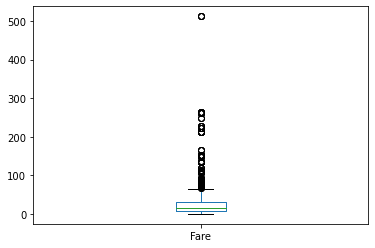

In [68]:
# box-whisker plot
# % matplotlib inline
df.Fare.plot(kind='box');

In [75]:
# categorical columns: Count
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [76]:
# categorical columns: Proportions
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [78]:
# train data Survived count
df[df.Survived != -111].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [80]:
# Passenger class: counts
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:>

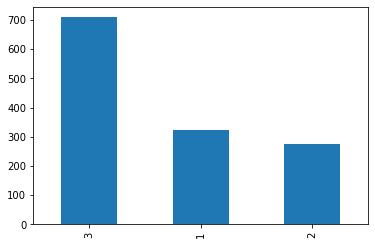

In [81]:
# visualize counts
df.Pclass.value_counts().plot(kind='bar')

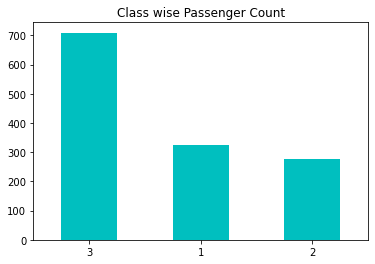

In [82]:
# set title, axis names to the plot
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Class wise Passenger Count', color='c');

# Distributions

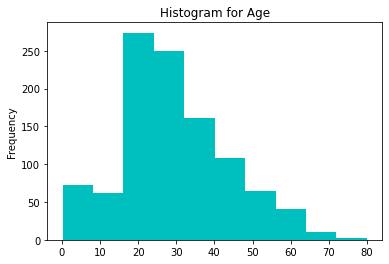

In [83]:
# use hist to create histograms
df.Age.plot(kind='hist', title='Histogram for Age', color='c');

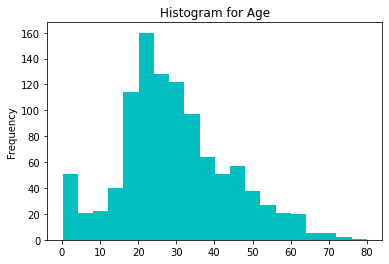

In [84]:
df.Age.plot(kind='hist', title='Histogram for Age', color='c', bins=20);

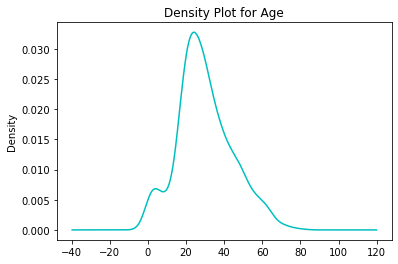

In [85]:
df.Age.plot(kind='kde', title='Density Plot for Age', color='c');

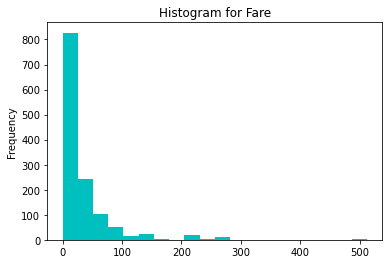

In [86]:
df.Fare.plot(kind='hist', title='Histogram for Fare', color='c', bins=20);    

In [90]:
print('skewness for age: {0:.2f}'.format(df.Age.skew()))
print('skewness for fare: {0:.2f}'.format(df.Fare.skew()))

skewness for age: 0.41
skewness for fare: 4.37


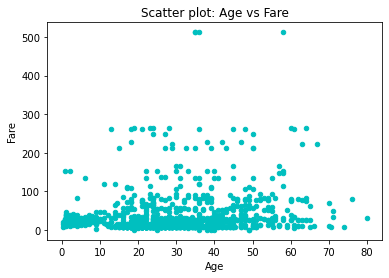

In [93]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter plot: Age vs Fare');

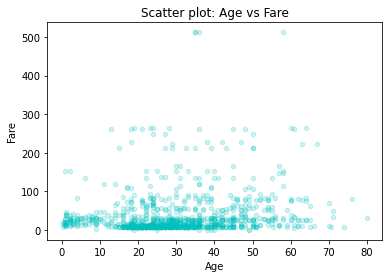

In [95]:
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter plot: Age vs Fare', alpha=0.2);

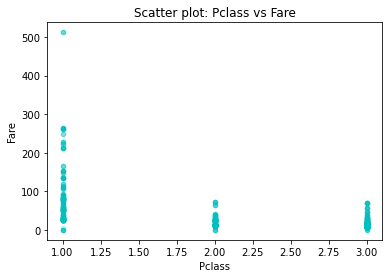

In [96]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot: Pclass vs Fare', alpha=0.2);

# Groupings & aggregations

In [97]:
# groupby Sex
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [98]:
# groupby Pclass
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [194]:
# groupby the above two together
df.groupby(['Pclass'])['Fare', 'Age'].median()

<ipython-input-194-c710348b46a2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Pclass'])['Fare', 'Age'].median()


,Fare,Age
Pclass,,
1,60.0000,36.0
2,15.0458,29.0
3,8.0500,26.0


In [104]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [107]:
# more complicated aggregations
# aggregations = {
#     'Fare': {
#         'mean_fare': 'mean',
#         'median_fare': 'median',
#         'max_fare': max,
#         'min_fare': np.min
#     },
#     'Age': {
#         'median_age': 'median',
#         'min_age': min,
#         'max_age': max,
#         'range_age': lambda x: max(x) - min(x)
#     }
# }

In [230]:
# df.groupby(['Pclass']).agg(aggregations)

In [109]:
# group more than 1
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

# Crosstab

In [111]:
 # crosstab on Sex & Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


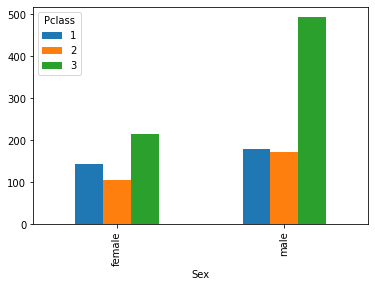

In [114]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

# Pivot

In [116]:
# extension of crosstab
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [117]:
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [118]:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


# Data Munging

### Feature: Fare

In [120]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [122]:
# how many people embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [124]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -111].Survived, df[df.Survived != -111].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [125]:
# impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [126]:
# option-2: explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [127]:
# replace the missing value with 'C'
df.Embarked.fillna('C', inplace=True)

In [128]:
# check for missing values remaining
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [130]:
# check for info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature: Fare

In [131]:
df[df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-111,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [132]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [133]:
df.Fare.fillna(median_fare, inplace=True)

In [134]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature: Age

In [136]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [137]:
df[df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
1300,-111,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,-111,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,-111,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


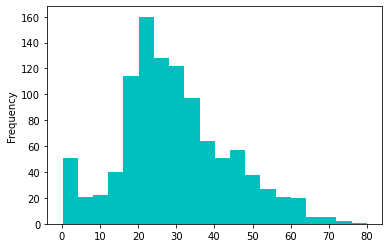

In [138]:
df.Age.plot(kind='hist', bins=20, color='c');

In [140]:
df.Age.mean()

29.881137667304014

Issue: due to few high values of 70's & 80's pushing the overall mean

In [141]:
# replace the median age of Gender
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

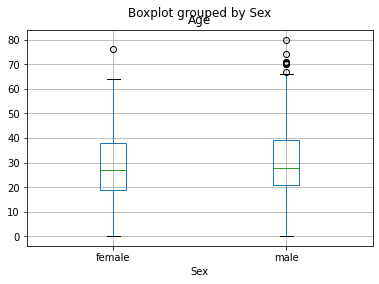

In [148]:
# visualize using box-plot
df[df.Age.notnull()].boxplot('Age', 'Sex');

# trying some other ways
# df[df.Age.notnull(), 'Age', 'Sex']
# [df.loc['Age', 'Sex']].plot(kind='box');

In [149]:
# could replace Age with info gathered from Sex
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)

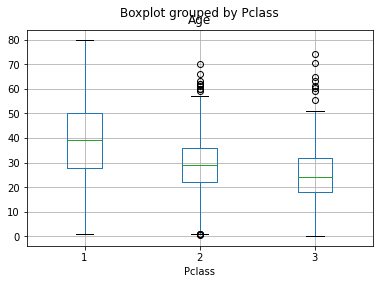

In [152]:
# replace with median age of Pclass
df[df.Age.notnull()].boxplot('Age', 'Pclass');

In [ ]:
# could replace Age with info gathered from Sex
# age_class_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(age_class_median, inplace=True)

option-4: Replace with median age of title

In [153]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [154]:
# Function to extract title from the name
def GetTitle(name):
    first_name_title = name.split(',')[1]
    title = first_name_title.split('.')[0]
    title = title.strip().lower()
    return title

In [155]:
# use map function to apply the function on each new Name value row i
df.Name.map(lambda x : GetTitle(x)) # alternatively you can use : df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [156]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [164]:
def GetTitle(name):
    title_group = {
        'mr': 'Mr',
        'mrs': 'Mrs',
        'miss': 'Miss',
        'master': 'Master',
        'don': 'Sir',
        'rev': 'Sir',
        'dr': 'Officer',
        'mme': 'Mrs',
        'ms': 'Mrs',
        'major': 'Officer',
        'lady': 'Lady',
        'sir': 'Sir',
        'mlle': 'Miss',
        'col': 'Officer',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
        'dona': 'Lady'
    }
    first_name_title = name.split(',')[1]
    title = first_name_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [165]:
# create title feature
df['Title'] = df.Name.map(lambda x : GetTitle(x))

In [166]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


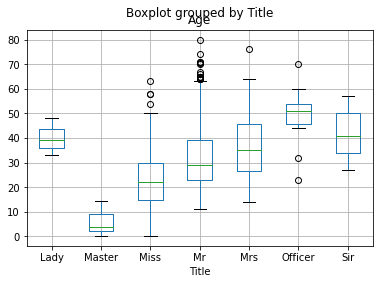

In [167]:
# Box-plot of Age with Title
df[df.Age.notnull()].boxplot('Age', 'Title');

In [168]:
# replacing missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [171]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


<AxesSubplot:>

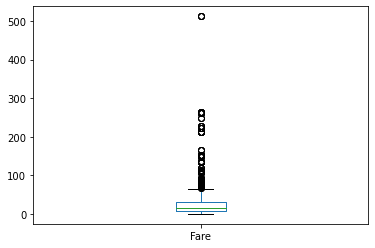

In [173]:
# box-plot to identify outliers
df.Fare.plot(kind='box')

In [172]:
# investigating the outlier
df.loc[df.Fare == df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,-111,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [174]:
# transformation to reduce skewness in Fare
logFare = np.log(df.Fare + 1.0) # Adding 1 to accomodate zero fares as log(0) is not defined

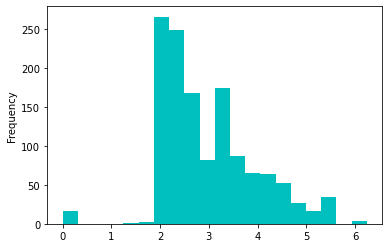

In [176]:
logFare.plot(kind='hist', color='c', bins=20);

In [177]:
# quantiles binning
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [179]:
# discretization: converting numerical features to categorical
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): ['very_low' < 'low' < 'high' < 'very_high']

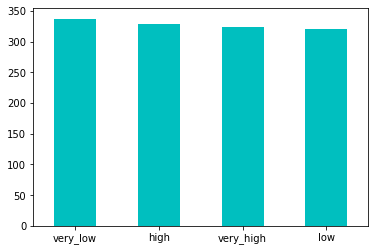

In [182]:
# make a plot
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', color='c',rot=0);

In [183]:
# create Fare_bin feature in the df
df['Fare_bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

In [184]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low


## Feature Engineering
### Feature: Age State (Adult or Child)

In [186]:
# Age state based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [187]:
# AgeState counts
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [205]:
# crosstab
pd.crosstab(df[df.Survived != -111].Survived, df[df.Survived != -111].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [229]:
# since groupby doesn't work on mutable objects thus create a new df
train_df = df.loc[df.Survived != -111, ['Survived', 'Pclass', 'AgeState']]
train_df.groupby(['Survived', 'Pclass']).AgeState.value_counts()

Survived  Pclass  AgeState
0         1       Adult        79
                  Child         1
          2       Adult        95
                  Child         2
          3       Adult       321
                  Child        51
1         1       Adult       125
                  Child        11
          2       Adult        66
                  Child        21
          3       Adult        88
                  Child        31
Name: AgeState, dtype: int64

In [210]:
# pivot
# df.pivot_table(index='AgeState', columns='Pclass', values='AgeState', aggfunc='value_counts')

### Feature: FamilySize

In [231]:
# Family: addding parents with siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

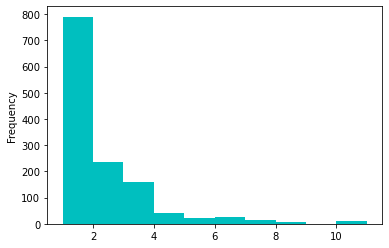

In [232]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [234]:
# further explore family feature
df.loc[df.FamilySize == df.FamilySize.max(), ['Name', 'Survived', 'FamilySize', 'Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-111,11,CA. 2343
1234,"Sage, Mr. John George",-111,11,CA. 2343


In [235]:
# create crosstab for family feature
pd.crosstab(df[df.Survived != -111].Survived, df[df.Survived != -111].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature: IsMother

In [236]:
# Feature IsMother
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [237]:
# Crosstab with IsMother
pd.crosstab(df[df.Survived != -111].Survived, df[df.Survived != -111].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Feature: Deck

In [238]:
# explore Cabins
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [239]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [240]:
# insect Cabin value 'T'
df.loc[df.Cabin == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,very_high,Adult,1,0


In [241]:
# set the value to 'NaN'
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [243]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [245]:
# extract n replace first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [246]:
# check Counts
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [247]:
# crosstab to look into survived feature Cabin value
pd.crosstab(df[df.Survived != -111].Survived, df[df.Survived != -111].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [248]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Ticket      1309 non-null   object  
 8   Fare        1309 non-null   float64 
 9   Cabin       294 non-null    object  
 10  Embarked    1309 non-null   object  
 11  Title       1309 non-null   object  
 12  Fare_bin    1309 non-null   category
 13  AgeState    1309 non-null   object  
 14  FamilySize  1309 non-null   int64   
 15  IsMother    1309 non-null   int64   
 16  Deck        1309 non-null   object  
dtypes: category(1), float64(2), int64(6), object(8)
memory usage: 215.3+ KB


## Categorical Feature Encoding

In [250]:
# feature sex
df['IsMale'] = np.where(df.Sex == 'male', '1', '0')

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Ticket      1309 non-null   object  
 8   Fare        1309 non-null   float64 
 9   Cabin       294 non-null    object  
 10  Embarked    1309 non-null   object  
 11  Title       1309 non-null   object  
 12  Fare_bin    1309 non-null   category
 13  AgeState    1309 non-null   object  
 14  FamilySize  1309 non-null   int64   
 15  IsMother    1309 non-null   int64   
 16  Deck        1309 non-null   object  
 17  IsMale      1309 non-null   object  
dtypes: category(1), float64(2), int64(6), object(9)


In [258]:
# encode following features with one-hot encoding
new_df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_bin', 'Embarked', 'AgeState'])

In [259]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Name                1309 non-null   object 
 2   Sex                 1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Ticket              1309 non-null   object 
 7   Fare                1309 non-null   float64
 8   Cabin               294 non-null    object 
 9   FamilySize          1309 non-null   int64  
 10  IsMother            1309 non-null   int64  
 11  IsMale              1309 non-null   object 
 12  Deck_A              1309 non-null   uint8  
 13  Deck_B              1309 non-null   uint8  
 14  Deck_C              1309 non-null   uint8  
 15  Deck_D              1309 non-null   uint8  
 16  Deck_E

In [260]:
# drop columns
new_df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [262]:
# reorder columns
columns = [column for column in new_df.columns if column != 'Survived']
columns = ['Survived'] + columns
new_df = new_df[columns]

In [263]:
# check info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   FamilySize          1309 non-null   int64  
 4   IsMother            1309 non-null   int64  
 5   IsMale              1309 non-null   object 
 6   Deck_A              1309 non-null   uint8  
 7   Deck_B              1309 non-null   uint8  
 8   Deck_C              1309 non-null   uint8  
 9   Deck_D              1309 non-null   uint8  
 10  Deck_E              1309 non-null   uint8  
 11  Deck_F              1309 non-null   uint8  
 12  Deck_G              1309 non-null   uint8  
 13  Deck_Z              1309 non-null   uint8  
 14  Pclass_1            1309 non-null   uint8  
 15  Pclass_2            1309 non-null   uint8  
 16  Pclass

# Save Processed Dataset

In [269]:
processed_data_path = os.path.join(os.path.pardir, 'src', 'data', 'processed')
print(processed_data_path)
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

../src/data/processed


In [271]:
# train data
new_df.loc[new_df.Survived != -111].to_csv(write_train_path)
# test data
columns = [column for column in new_df.columns if column != 'Survived']
new_df.loc[new_df.Survived == -111, columns].to_csv(write_test_path)